## Контрольная на тему классификации

Данные конкретно о клиентах банка:

1. - age: возраст
2. - job:тип работы
3. - marital: семейный статус
4. - education: уровень образования
5. - default: имеет ли кредит в просрочке
6. - housing: имеет ли клиент жилищный кредит
7. - loan: имеет ли клиент персональный кредит
8. - balance: баланс клиента

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

8. - contact: тип контакта с клиентом
9. - month:месяц, в котором был последний контакт
10. - day: день, в который был последний контакт
11. - duration: длительность контакта в секундах

Прочие признаки:

12. - campaign: количество контактов с этим клиентом в течение этой кампании
13. - pdays: количество пропущенных дней с момента последней маркетинговой кампании до контакта в этой
14. - previous: количество контактов до этой кампании
15. - poutcome: результат прошлой маркетинговой кампании

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в нашем банке. Именно ее мы будем пытаться предсказать в данном кейсе.



## Первичная обработка данных (2 балла)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Задание 1 (0.5 балла)

Откройте предложенные данные. Начнем с того, что оценим, насколько они готовы к дальнейшему анализу. В первую очередь давайте выясним, есть ли в данных пропущенные значения (пустые, незаполненные ячейки)?

In [2]:
# ваш код
import pandas as pd
data = pd.read_csv('bank_fin.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.isna().sum()
# В данных есть пустые (или незаполненные) ячейки. Их 25 штук, и все они находятся в столбике balance

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

#### Задание 2 (0.75 балла)

Мы нашли пропущенные значения, и хотелось бы теперь их обработать. Однако мы не можем этого сделать, так как не все данные у нас находятся в корректном виде. Обратите внимание на признак balance. В данных содержится лишняя запятая и знак доллара. По этой причине этот признак не считывается как число. Обработайте данные этого признака так, чтобы он был преобразован в тип float. 
Подсказка: Вам понадобится метод str.replace.

Пример: `df['balance'] = df['balance'].str.replace(',00', '')`

In [4]:
# ваш код
data['balance'] = data['balance'].str.replace(',00', '')
data['balance'] = data['balance'].str.replace(' ', '')
data['balance'] = data['balance'].str.replace('$', '')
data['balance']

0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11162, dtype: object

In [5]:
data['balance'] = data['balance'].astype(float)
data['balance']

0        2343.0
1          45.0
2        1270.0
3        2476.0
4         184.0
          ...  
11157       1.0
11158     733.0
11159      29.0
11160       0.0
11161       0.0
Name: balance, Length: 11162, dtype: float64

__Задание 3. (0.75 балла)__

Обработайте пропуски с помощью их замены. Выберите сами, чем вы замените пропуски. Поясните свой выбор.

In [6]:
# ваш код
data_balance_median = data['balance'].median()
data_balance_median

550.0

In [7]:
data['balance'] = data['balance'].fillna(data_balance_median)
# Заменять медианной - один из наиболее безболезненных вариантов замены, так как медиана сравнительно
# нечувствительна к выбросам, чем, например, среднее арифметическое (mean)

In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Разведочный анализ данных (EDA) (2.5 балла)

__Задание 3. (1 балл)__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех числовых столбцов. Напишите интерпретацию для трех любых признаков.(Для каждого 3-4 предложения)

In [9]:
# ваше решение
data.describe()
# Min. Этот показатель помогает нам заметить минимальное значение по каждому из числовых столбцов. 
# Так, мы видим, что минимальный возраст 18, минимальный день, в который был последний контакт, 1, 
# минимальная длительность контакта в секундах 2 и тд.
#
# Max. Этот показатель помогает нам заметить максимальное значение по каждому из числовых столбцов. 
# Так, мы видим, что максимальный возраст 95, максимальный день, в который был последний контакт, 31, 
# максимальная длительность контакта в секундах 3881 и тд.
#
# Mean. Этот показатель помогает нам заметить среднее значение по каждому из числовых столбцов. 
# Так, мы видим, что средний возраст примерно равен 41, средний день, в который был последний контакт,
# примерно равен 15.66, средняя длительность контакта в секундах примерно равна 372 и тд.

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1526.936033,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3224.829691,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1699.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
import statistics
statistics.variance(data['day'], xbar=None)
# Нашли дисперсию для показателя day. Дисперсия - квадрат std из таблицы describe

70.90885441746954

__Задание 4. (0.5 балла)__

Давайте изучим, какое у нас распределение целевой переменной: есть ли несбалансированность классов? Для того, чтобы это сделать, вычислите частоты для открывших депозит и для тех, кто его не открыл. Напишите интерпретацию (2-3 предложения)

In [11]:
# ваше решение
y = data['deposit']

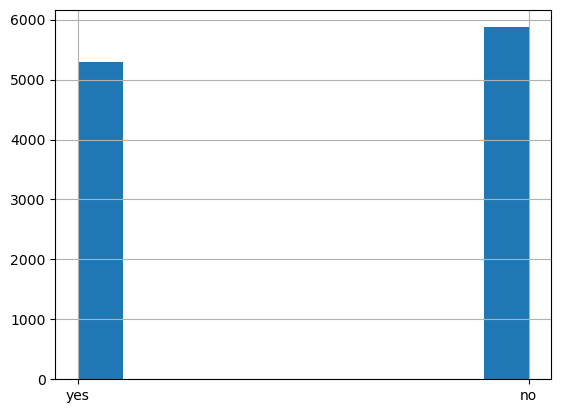

In [12]:
y.hist();
# Мы видим, что открыли депозит чуть меньше раз (примерно 5300), чем не открыли (примерно 5800). Не смотря на то,
# что разница составляет около 10%, вряд ли можно говорить о несбалансированности классов

__Задание 5. (0.5 балла)__

Какая средняя длительность последнего контакта была для контактов в июне?

In [13]:
# ваше решение
data[data['month'] == 'jun']['duration'].mean()

364.7422258592471

__Задание 6. (0.5 балла)__

Какой минимальный баланс у женатых людей, открывших депозит?

In [14]:
# ваше решение
data[data['marital'] == 'married']['balance'].min()

-6847.0

## Построение моделей ML (7.5 баллов)

__Задание 7. (0.5 балла)__

Превратите все категориальные переменные в дамми-переменные. А целевую переменную (взял ли клиент депозит)перекодируйте в 1 и 0.

In [15]:
# ваше решение
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [17]:
data = pd.get_dummies(data)
data.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343.0,5,1042,1,-1,0,1,True,False,...,False,False,True,False,False,False,False,False,False,True
1,56,45.0,5,1467,1,-1,0,1,True,False,...,False,False,True,False,False,False,False,False,False,True
2,41,1270.0,5,1389,1,-1,0,1,False,False,...,False,False,True,False,False,False,False,False,False,True
3,55,2476.0,5,579,1,-1,0,1,False,False,...,False,False,True,False,False,False,False,False,False,True
4,54,184.0,5,673,2,-1,0,1,True,False,...,False,False,True,False,False,False,False,False,False,True


__Задание 8. (0.5 балла)__

Будем предсказывать, открыл ли клиент депозит. Разделите данные на обучающую и тестовую выборку. Задайте при разбиении параметр random_state = 42, а размер тестовой выборки возьмите за 0.33. 

In [18]:
# ваше решение
from sklearn.model_selection import train_test_split
X = data.drop(['deposit'], axis=1)
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)
y_test.shape

(3684,)

__Задание 9. (2.5 балла)__

Постройте предсказательную модель с помощью логистической регрессии и случайного леса, а также KNN c 5,7,9 соседями. Сравните качество с помощью как минимум трех метрик. Какая модель показала себя лучше? Качество оценивайте по тестовой выборке.

In [19]:
# ваше решение
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000 #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [22]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4698
           1       0.84      0.79      0.81      4231

    accuracy                           0.83      8929
   macro avg       0.83      0.83      0.83      8929
weighted avg       0.83      0.83      0.83      8929

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1175
           1       0.82      0.78      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



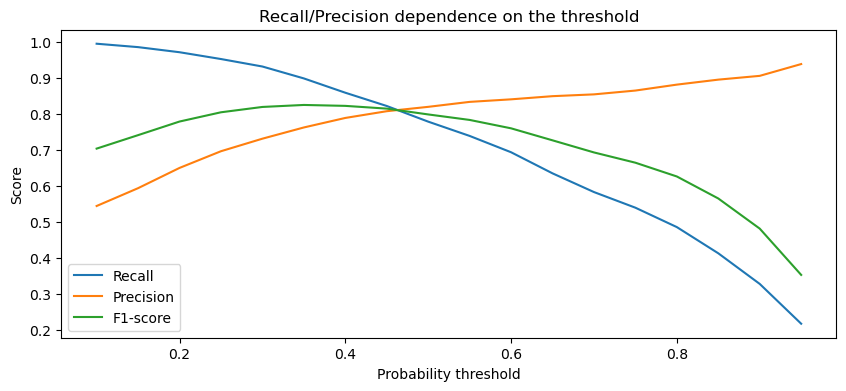

In [23]:
import numpy as np
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.legend();

In [24]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.45
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1175
           1       0.81      0.82      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [25]:
# Переходим к дереву решений
from sklearn import tree
#Создаем объект класса дерево решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    #min_samples_leaf=5,
    max_depth=8,
    random_state=42
)
#Обучаем дерево по алгоритму CART
dt.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = dt.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = dt.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.84
Test: 0.81


In [26]:
from sklearn import ensemble #ансамбли
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.83


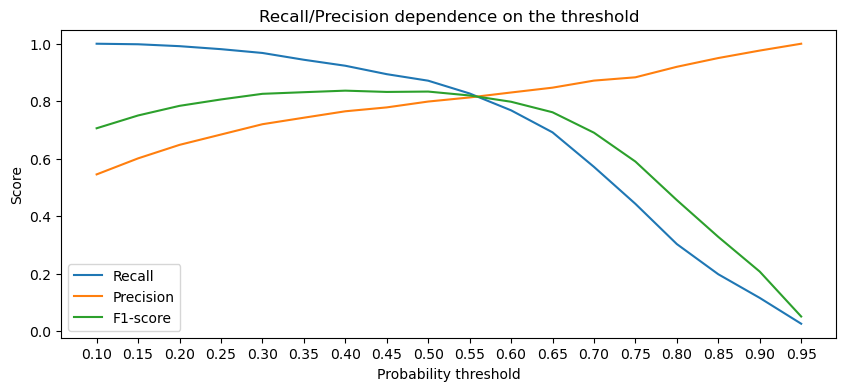

In [27]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [28]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.55
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1175
           1       0.81      0.83      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [29]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 7 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 7)

# обучаем его по тренировочные выборке 
knn.fit(X_train, y_train)

# строим для тестовой выборки прогнозы 
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 
#p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)

In [30]:
p_pred_knn[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
p_pred_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [33]:
from sklearn.metrics import accuracy_score

# считаем долю верно построенных прогнозов, если мы не боремся с выбросами 
accuracy_score(y_test, y_pred_knn)

0.5261979399910435

In [34]:
from sklearn.preprocessing import MinMaxScaler  # класс для скалирования

# Объявили скалировшик 
scaler = MinMaxScaler( )

# Он сам будет считать максимумы, минимумы и делить! 
# (x - min)/(max - min) => [0; 1]

# Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы)
scaler.fit(X_train) 

# Теперь применяем его к нашим данным, скалировщик сам применяем формулу (x - min)/(max - min)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [35]:
print(X_train_norm.max(), X_test_norm.max())

1.0000000000000002 1.1819012797074955


In [36]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
p_pred_knn = knn.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)

In [37]:
accuracy_score(y_test, y_pred_knn)
# Сравнительно низкий показатель, knn с 7 соседями - не лучший вариант для наших данных

0.7362292879534259

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 5 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 5)

# обучаем его по тренировочные выборке 
knn.fit(X_train, y_train)

# строим для тестовой выборки прогнозы 
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 
#p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)
from sklearn.metrics import accuracy_score

# считаем долю верно построенных прогнозов, если мы не боремся с выбросами 
accuracy_score(y_test, y_pred_knn)

0.5261979399910435

In [39]:
from sklearn.preprocessing import MinMaxScaler  # класс для скалирования! 

# Объявили скалировшик 
scaler = MinMaxScaler( )

# Он сам будет считать максимумы, минимумы и делить! 
# (x - min)/(max - min) => [0; 1]

# Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы)
scaler.fit(X_train) 

# Теперь применяем его к нашим данным, скалировщик сам применяем формулу (x - min)/(max - min)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
p_pred_knn = knn.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)
accuracy_score(y_test, y_pred_knn)
# Видим, что knn c 5 соседями лучше, чем knn с 7 соседями

0.741603224361845

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# объявляем метод 9 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 9)

# обучаем его по тренировочные выборке 
knn.fit(X_train, y_train)

# строим для тестовой выборки прогнозы 
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 
#p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)
from sklearn.metrics import accuracy_score

# считаем долю верно построенных прогнозов, если мы не боремся с выбросами 
accuracy_score(y_test, y_pred_knn)

0.5261979399910435

In [41]:
from sklearn.preprocessing import MinMaxScaler  # класс для скалирования! 

# Объявили скалировшик 
scaler = MinMaxScaler( )

# Он сам будет считать максимумы, минимумы и делить! 
# (x - min)/(max - min) => [0; 1]

# Обучили его на тренировочной выборке (он само посчитал все максимумы, минимумы)
scaler.fit(X_train) 

# Теперь применяем его к нашим данным, скалировщик сам применяем формулу (x - min)/(max - min)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_norm, y_train)
y_pred_knn = knn.predict(X_test_norm)
p_pred_knn = knn.predict_proba(X_test_norm) 
p_pred_knn = p_pred_knn[:, 1]  # P(y = 1 | X)
accuracy_score(y_test, y_pred_knn)
# Knn с 5 соседями лучше, чем с 9, так как у последнего accuracy_score ниже. У knn с 9 соседями accuracy_score  выше,
# чем для 7 соседей. Knn с 5 соседями лучше, чем knn с 7 соседями. На наших данных лучше всего предсказывает 
# случайный лес с показателем 0.83 на тестовой выборке

0.7407075682937752

#### Задание 10 (1.5 балла)

Обучите градиентный бустинг, подобрав параметры с помощью перебора по сетке. Улучшилось ли качество?

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [43]:
model_for_gs = GradientBoostingClassifier()
params = {"n_estimators": 2**np.arange(8), "learning_rate": 0.1**np.arange(3)}
gs = GridSearchCV(model_for_gs, 
                  params, 
                  cv=3, 
                  scoring=make_scorer(f1_score),
                  verbose=5)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END .learning_rate=1.0, n_estimators=1;, score=0.733 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=1;, score=0.782 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=1;, score=0.796 total time=   0.1s
[CV 1/3] END .learning_rate=1.0, n_estimators=2;, score=0.807 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=2;, score=0.807 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=2;, score=0.786 total time=   0.1s
[CV 1/3] END .learning_rate=1.0, n_estimators=4;, score=0.817 total time=   0.1s
[CV 2/3] END .learning_rate=1.0, n_estimators=4;, score=0.808 total time=   0.1s
[CV 3/3] END .learning_rate=1.0, n_estimators=4;, score=0.806 total time=   0.1s
[CV 1/3] END .learning_rate=1.0, n_estimators=8;, score=0.832 total time=   0.3s
[CV 2/3] END .learning_rate=1.0, n_estimators=8;, score=0.836 total time=   0.2s
[CV 3/3] END .learning_rate=1.0, n_estimators=8;

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1.  , 0.1 , 0.01]),
                         'n_estimators': array([  1,   2,   4,   8,  16,  32,  64, 128])},
             scoring=make_scorer(f1_score), verbose=5)

In [44]:
print("Лучшие гиперпараметры", gs.best_params_)
print("Лучшие значения метрики", gs.best_score_)

Лучшие гиперпараметры {'learning_rate': 0.1, 'n_estimators': 128}
Лучшие значения метрики 0.8472782758140416


In [45]:
# YOUR CODE
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=26)
model_xgb.fit(X_train,y_train)
preds_test = model_xgb.predict(X_test)
f1_score(preds_test, y_test)
# Мы видим, что качество модели  улучшилось (примерно на 1.5%). На большой выборке (в промышленных)
# масштабах это очень значительно. Предпочтем градиентный бустинг с перебором по сетке, даже несмотря на то, что
# придется подождать дополнительное время.

0.8441978733240868

#### Задание 11 (1.5 балла)

Реализуйте стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. Изменилось ли качество?

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=10, random_state=42)
)

stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=42))

In [47]:
from sklearn.metrics import f1_score

y_pred_stack = stacking_clf.predict(X_test_scaled)
print('f1-score:', round(f1_score(y_test, y_pred_stack),2))
# Качество лучше не стало, следовательно модель не является предпочтительной

f1-score: 0.81


#### Задание 12 (1 балла)

Выведите три наиболее важных признака, основываясь на любой обученной модели (на ваш выбор)

In [48]:
# ваше решение
feature_importances = rf.feature_importances_  # rf - наша обученная модель 
feature_names = X_train.columns  # X_train содержит наши факторы

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False) # поставим значимость по убыванию

top3_features = importances_df.head(3)
print(top3_features)

             Feature  Importance
3           duration    0.441583
49  poutcome_success    0.061322
0                age    0.046886
